# Data preparation 
### Load data file - diabetes_health_indicators.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015.  The target variable Diabetes_012 has 3 classes. 
### 0 is for no diabetes or only during pregnancy
### 1 is for prediabetes
### 2 is for diabetes 
### There is class imbalance in this dataset. This dataset has 21 feature variables. Info about original data collected by BRFSS https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./diabetes_health_indicators.csv")
data = df.copy()

In [3]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
df.shape

(253680, 22)

In [7]:
df.isnull().values.any()

False

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Farhana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Farhana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Farhana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

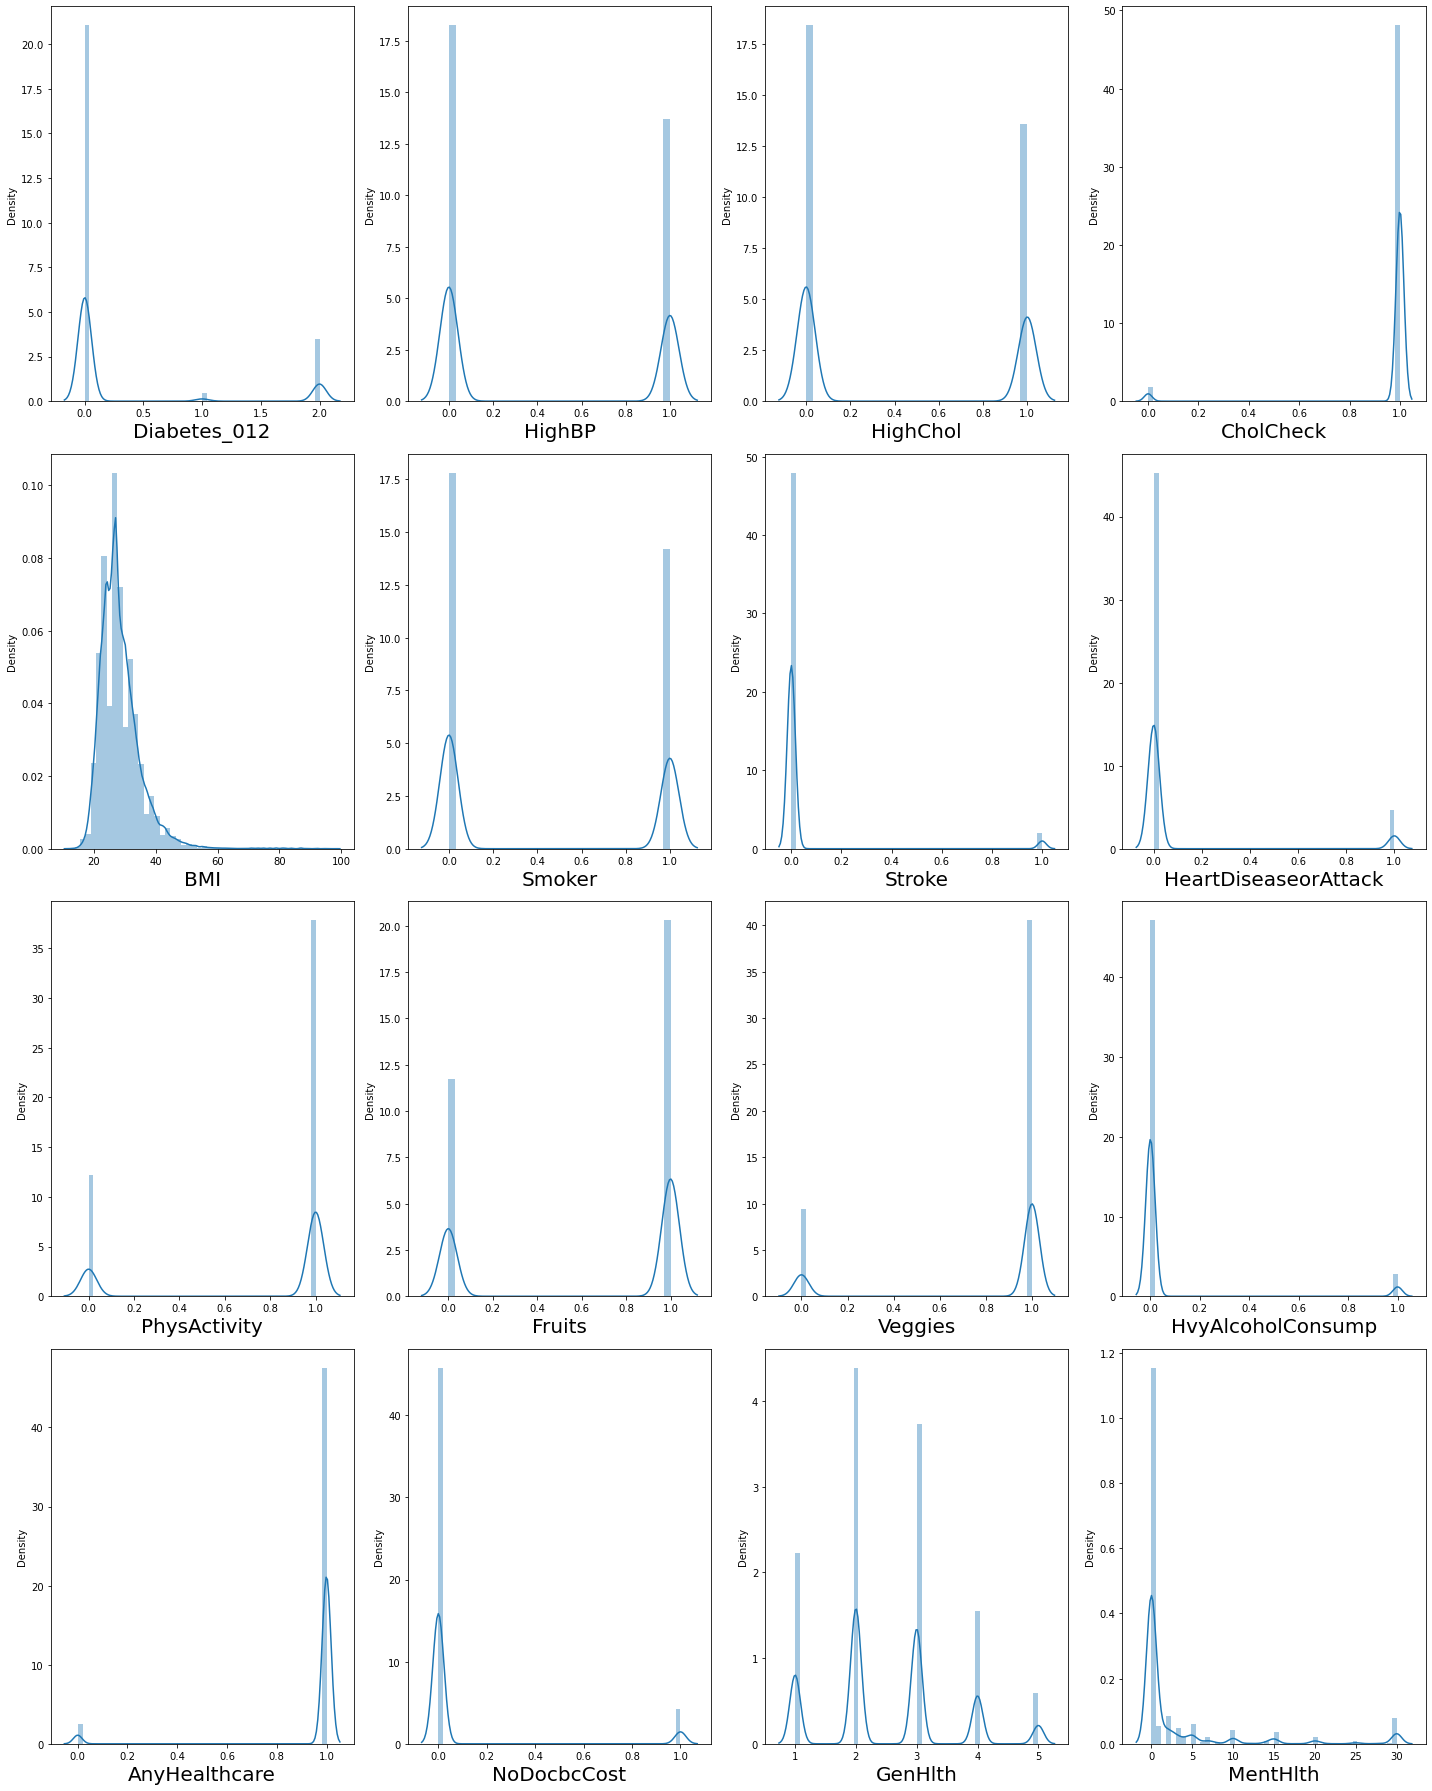

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Text(0.5, 1.0, 'Diabetes statuses of 253680 observations!')

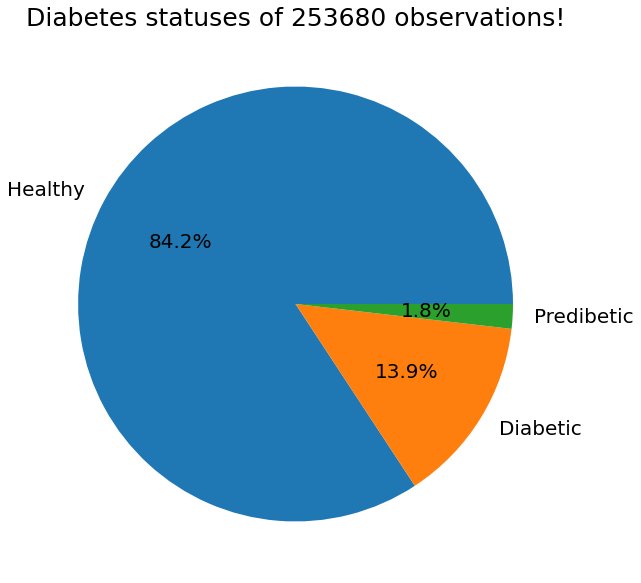

In [9]:
df['Diabetes_012_str'] = df['Diabetes_012'].replace({0.0:"Healthy", 1.0:"Predibetic", 2.0:"Diabetic"})
axes = df["Diabetes_012_str"].value_counts().plot.pie(autopct="%.1f%%", fontsize=20, figsize=(10,10))
axes.set_ylabel(' ')
axes.set_title("Diabetes statuses of {} observations!".format(df.shape[0]), fontsize=25)

In [10]:
#Comparing non-smokers to smokers in each diabetic status, normalized group diabetes status and smokers

diabetes_smokers = df.groupby(['Diabetes_012','Smoker']).size().reset_index(name='Count')
print(diabetes_smokers)

   Diabetes_012  Smoker   Count
0           0.0     0.0  121879
1           0.0     1.0   91824
2           1.0     0.0    2349
3           1.0     1.0    2282
4           2.0     0.0   17029
5           2.0     1.0   18317


In [11]:
Total_stat = diabetes_smokers.groupby(["Diabetes_012"]).sum().Count
Total_stat

Diabetes_012
0.0    213703
1.0      4631
2.0     35346
Name: Count, dtype: int64

In [12]:
Temp = diabetes_smokers.set_index('Diabetes_012').join(Total_stat,rsuffix='_')
Temp['Percentage'] = Temp['Count']/Temp['Count_']
Temp = Temp.reset_index()
Temp

,Diabetes_012,Smoker,Count,Count_,Percentage
0,0.0,0.0,121879,213703,0.570320
1,0.0,1.0,91824,213703,0.429680
2,1.0,0.0,2349,4631,0.507234
3,1.0,1.0,2282,4631,0.492766
4,2.0,0.0,17029,35346,0.481780
5,2.0,1.0,18317,35346,0.518220


In [13]:
Temp['Diabetes_012'] = Temp['Diabetes_012'].replace({0.0:"Healthy", 1.0:"Pre-diabetec", 2.0:"Diabetic"})
Temp['Smoker'] = Temp['Smoker'].replace({0.0:"Non-smoker", 1.0:"Smoker"})

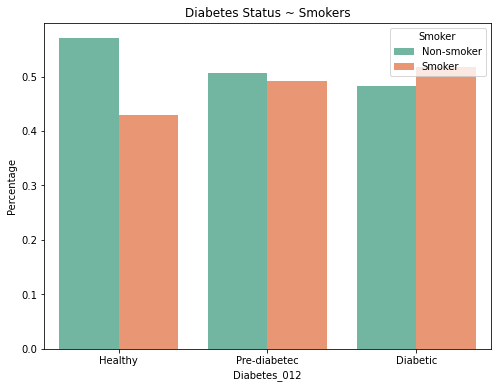

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x='Diabetes_012', y='Percentage', hue='Smoker', data=Temp, palette='Set2')
plt.title("Diabetes Status ~ Smokers")
plt.show()

In [15]:
df.shape

(253680, 23)

In [16]:
df['MentHlth']

0         18.0
1          0.0
2         30.0
3          0.0
4          3.0
          ... 
253675     0.0
253676     0.0
253677     0.0
253678     0.0
253679     0.0
Name: MentHlth, Length: 253680, dtype: float64

In [17]:
diabetes_MentlHlth_temp = df['MentHlth']
df.loc[diabetes_MentlHlth_temp<6, 'MentlHlth_Group'] = '0-5'
df.loc[((diabetes_MentlHlth_temp>=6) & (diabetes_MentlHlth_temp<=24)), 'MentlHlth_Group'] = '6-24'
df.loc[((diabetes_MentlHlth_temp>=25) & (diabetes_MentlHlth_temp<=30)), 'MentlHlth_Group'] = '25-30'
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012_str,MentlHlth_Group
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,Healthy,6-24
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,Healthy,0-5
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,Healthy,25-30
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,Healthy,0-5
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,Healthy,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,Healthy,0-5
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,Diabetic,0-5
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,Healthy,0-5
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,Healthy,0-5


In [18]:
diabetes_Mental = df.groupby(['Diabetes_012','MentlHlth_Group']).size().reset_index(name = 'Count')
print(diabetes_Mental)

   Diabetes_012 MentlHlth_Group   Count
0           0.0             0-5  185417
1           0.0           25-30   10330
2           0.0            6-24   17956
3           1.0             0-5    3696
4           1.0           25-30     408
5           1.0            6-24     527
6           2.0             0-5   28359
7           2.0           25-30    3147
8           2.0            6-24    3840


In [19]:
Total_Stat_Mntl = diabetes_Mental.groupby('Diabetes_012').sum()
Total_Stat_Mntl

,Count
Diabetes_012,
0.0,213703
1.0,4631
2.0,35346


In [20]:
Temp1 = diabetes_Mental.set_index('Diabetes_012').join(Total_Stat_Mntl, rsuffix='_')
Temp1['Percentage'] = Temp1['Count'] / Temp1['Count_']
Temp1 = Temp1.reset_index()
Temp1

,Diabetes_012,MentlHlth_Group,Count,Count_,Percentage
0,0.0,0-5,185417,213703,0.867639
1,0.0,25-30,10330,213703,0.048338
2,0.0,6-24,17956,213703,0.084023
3,1.0,0-5,3696,4631,0.798100
4,1.0,25-30,408,4631,0.088102
5,1.0,6-24,527,4631,0.113798
6,2.0,0-5,28359,35346,0.802326
7,2.0,25-30,3147,35346,0.089034
8,2.0,6-24,3840,35346,0.108640


In [21]:
Temp1['Diabetes_012'] = Temp1['Diabetes_012'].replace({0.0:"Healthy", 1.0:"Pre-Diabetic", 2.0:"Diabetic"})
Temp1['MentlHlth_Group'] = Temp1['MentlHlth_Group'].replace({'0-5':"Not so sad", '6-24':"Sad", '25-30':"Very Sad"})

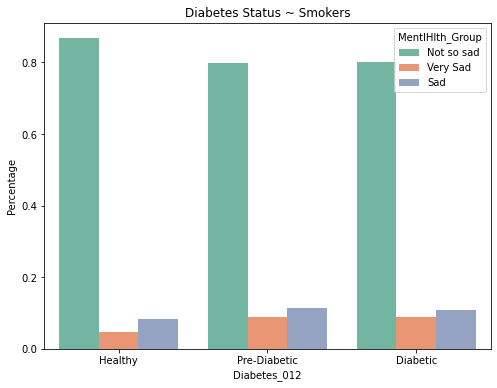

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x='Diabetes_012', y='Percentage', hue='MentlHlth_Group', data=Temp1, palette='Set2')
plt.title("Diabetes Status ~ Smokers")
plt.show()

Check Diabetes Status VS High Blood Pressure

In [23]:
diabetes_bp = df.groupby(['Diabetes_012','HighBP']).size().reset_index(name='Count')
print(diabetes_bp)

   Diabetes_012  HighBP   Count
0           0.0     0.0  134391
1           0.0     1.0   79312
2           1.0     0.0    1718
3           1.0     1.0    2913
4           2.0     0.0    8742
5           2.0     1.0   26604


In [24]:
diabetes_bp_total_stat = diabetes_bp.groupby(['Diabetes_012']).sum()
diabetes_bp_total_stat

,HighBP,Count
Diabetes_012,,
0.0,1.0,213703
1.0,1.0,4631
2.0,1.0,35346


In [25]:
diabetes_bp_total_stat_temp = diabetes_bp.set_index('Diabetes_012').join(diabetes_bp_total_stat,rsuffix='_')
diabetes_bp_total_stat_temp['Percentage'] = diabetes_bp_total_stat_temp['Count'] / diabetes_bp_total_stat_temp['Count_']
diabetes_bp_total_stat_temp = diabetes_bp_total_stat_temp.reset_index()
diabetes_bp_total_stat_temp

,Diabetes_012,HighBP,Count,HighBP_,Count_,Percentage
0,0.0,0.0,134391,1.0,213703,0.628868
1,0.0,1.0,79312,1.0,213703,0.371132
2,1.0,0.0,1718,1.0,4631,0.370978
3,1.0,1.0,2913,1.0,4631,0.629022
4,2.0,0.0,8742,1.0,35346,0.247326
5,2.0,1.0,26604,1.0,35346,0.752674


In [26]:
diabetes_bp_total_stat_temp['Diabetes_012'] = diabetes_bp_total_stat_temp['Diabetes_012'].replace({0.0:"Healthy", 1.0:"Pre-Diabetic", 2.0:"Diabetic"})
diabetes_bp_total_stat_temp['HighBP'] = diabetes_bp_total_stat_temp['HighBP'].replace({0.0:"No", 1.0:"Yes"})

Text(0.5, 1.0, 'Diabetes Status VS High Blood Pressure')

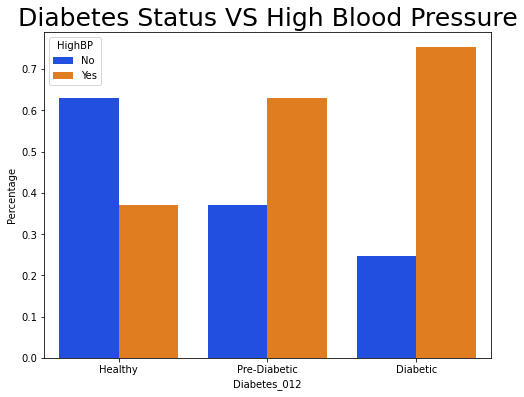

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x='Diabetes_012', y='Percentage', hue='HighBP', data=diabetes_bp_total_stat_temp, palette='bright')
plt.title("Diabetes Status VS High Blood Pressure", fontsize=25)

Conclusion: If blood pressure is high there is a chance that a person is diabetic

Check: Diabetes Status VS High Cholestirol

Text(0.5, 1.0, 'Diabetes Status VS High Cholestirol')

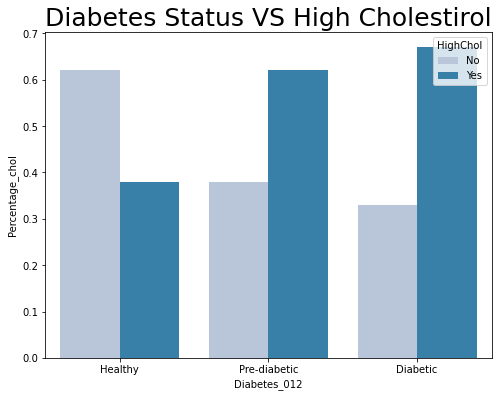

In [28]:
#group diabetes status & BP
diabetes_chol = df.groupby(['Diabetes_012', 'HighChol']).size().reset_index(name = 'Count')
# diabetes_chol

diabetes_chol_Total_Stat = diabetes_chol.groupby(['Diabetes_012']).sum().Count
# diabetes_chol_Total_Stat

diabetes_chol_Total_Stat_Temp = diabetes_chol.set_index('Diabetes_012').join(diabetes_chol_Total_Stat,rsuffix='_')
diabetes_chol_Total_Stat_Temp['Percentage_chol'] = diabetes_chol_Total_Stat_Temp['Count']/diabetes_chol_Total_Stat_Temp['Count_']
diabetes_chol_Total_Stat_Temp = diabetes_chol_Total_Stat_Temp.reset_index()
# diabetes_chol_Total_Stat_Temp

diabetes_chol_Total_Stat_Temp['Diabetes_012'] = diabetes_chol_Total_Stat_Temp['Diabetes_012'].replace({0.0:'Healthy', 1.0:'Pre-diabetic', 2.0:'Diabetic'})
diabetes_chol_Total_Stat_Temp['HighChol'] = diabetes_chol_Total_Stat_Temp['HighChol'].replace({0.0:'No', 1.0:'Yes'})

#visualize diabetes status ~ BP
plt.figure(figsize = (8,6))
axes = sns.barplot(x = 'Diabetes_012', y = 'Percentage_chol', hue = 'HighChol', data = diabetes_chol_Total_Stat_Temp, palette = 'PuBu')
plt.title("Diabetes Status VS High Cholestirol", fontsize=25)

Conclusions:

If cholesterol is high there is a chance that a person has diabetes
There is a correlation of Diabetes Status with a columns - cholesterol and blood pressure ...

Diabetes Status VS Stroke

Text(0.5, 1.0, 'Diabetes Status Vs Heart Stroke')

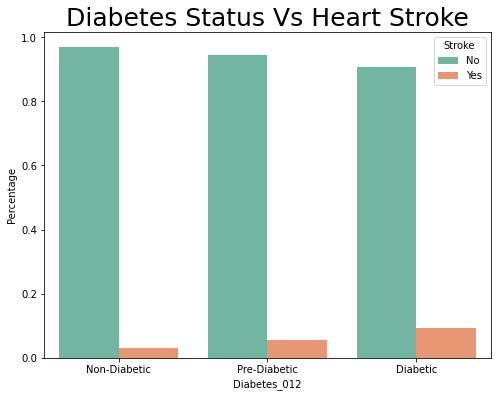

In [29]:
diabetes_stroke = df.groupby(['Diabetes_012','Stroke']).size().reset_index(name = 'Count')
diabetes_stroke_stat = diabetes_stroke.groupby(['Diabetes_012']).sum().Count
diabetes_stroke_stat_temp = diabetes_stroke.set_index('Diabetes_012').join(diabetes_stroke_stat, rsuffix='_')
diabetes_stroke_stat_temp['Percentage'] =diabetes_stroke_stat_temp['Count']/diabetes_stroke_stat_temp['Count_']
diabetes_stroke_stat_temp = diabetes_stroke_stat_temp.reset_index()
diabetes_stroke_stat_temp['Diabetes_012'] = diabetes_stroke_stat_temp['Diabetes_012'].replace({0.0:"Non-Diabetic", 1.0:"Pre-Diabetic", 2.0:"Diabetic"})
diabetes_stroke_stat_temp['Stroke'] = diabetes_stroke_stat_temp['Stroke'].replace({0.0:"No", 1.0:"Yes"})

plt.figure(figsize=(8,6))
sns.barplot(x='Diabetes_012', y='Percentage', hue='Stroke', data= diabetes_stroke_stat_temp, palette='Set2')
plt.title("Diabetes Status Vs Heart Stroke", fontsize=25)

Conclusion : A healthy person is less likely to have a heart attack than a person with diabetes

In [30]:
df['Stroke'].value_counts() / len(df)

0.0    0.959429
1.0    0.040571
Name: Stroke, dtype: float64

In [31]:
df['HighBP'].value_counts() / len(df)

0.0    0.570999
1.0    0.429001
Name: HighBP, dtype: float64

In [32]:
df['HighChol'].value_counts() / len(df)

0.0    0.575879
1.0    0.424121
Name: HighChol, dtype: float64

# Selecting and Training Models
Select and Train a few Algorithms(Linear Regression, Decision Tree, RandomForest)
Evaluation using Mean Squared Error
Model Evaluation using Cross Validation
Hyperparameter Tuning using GridSearchCV
Check Feature Importance
Evaluate the Final System on test data
Saving the Model

In [5]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
data.drop(data.columns[15:22], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
dtype

In [8]:
y = data['Diabetes_012']
X =data.drop(columns = ['Diabetes_012'])

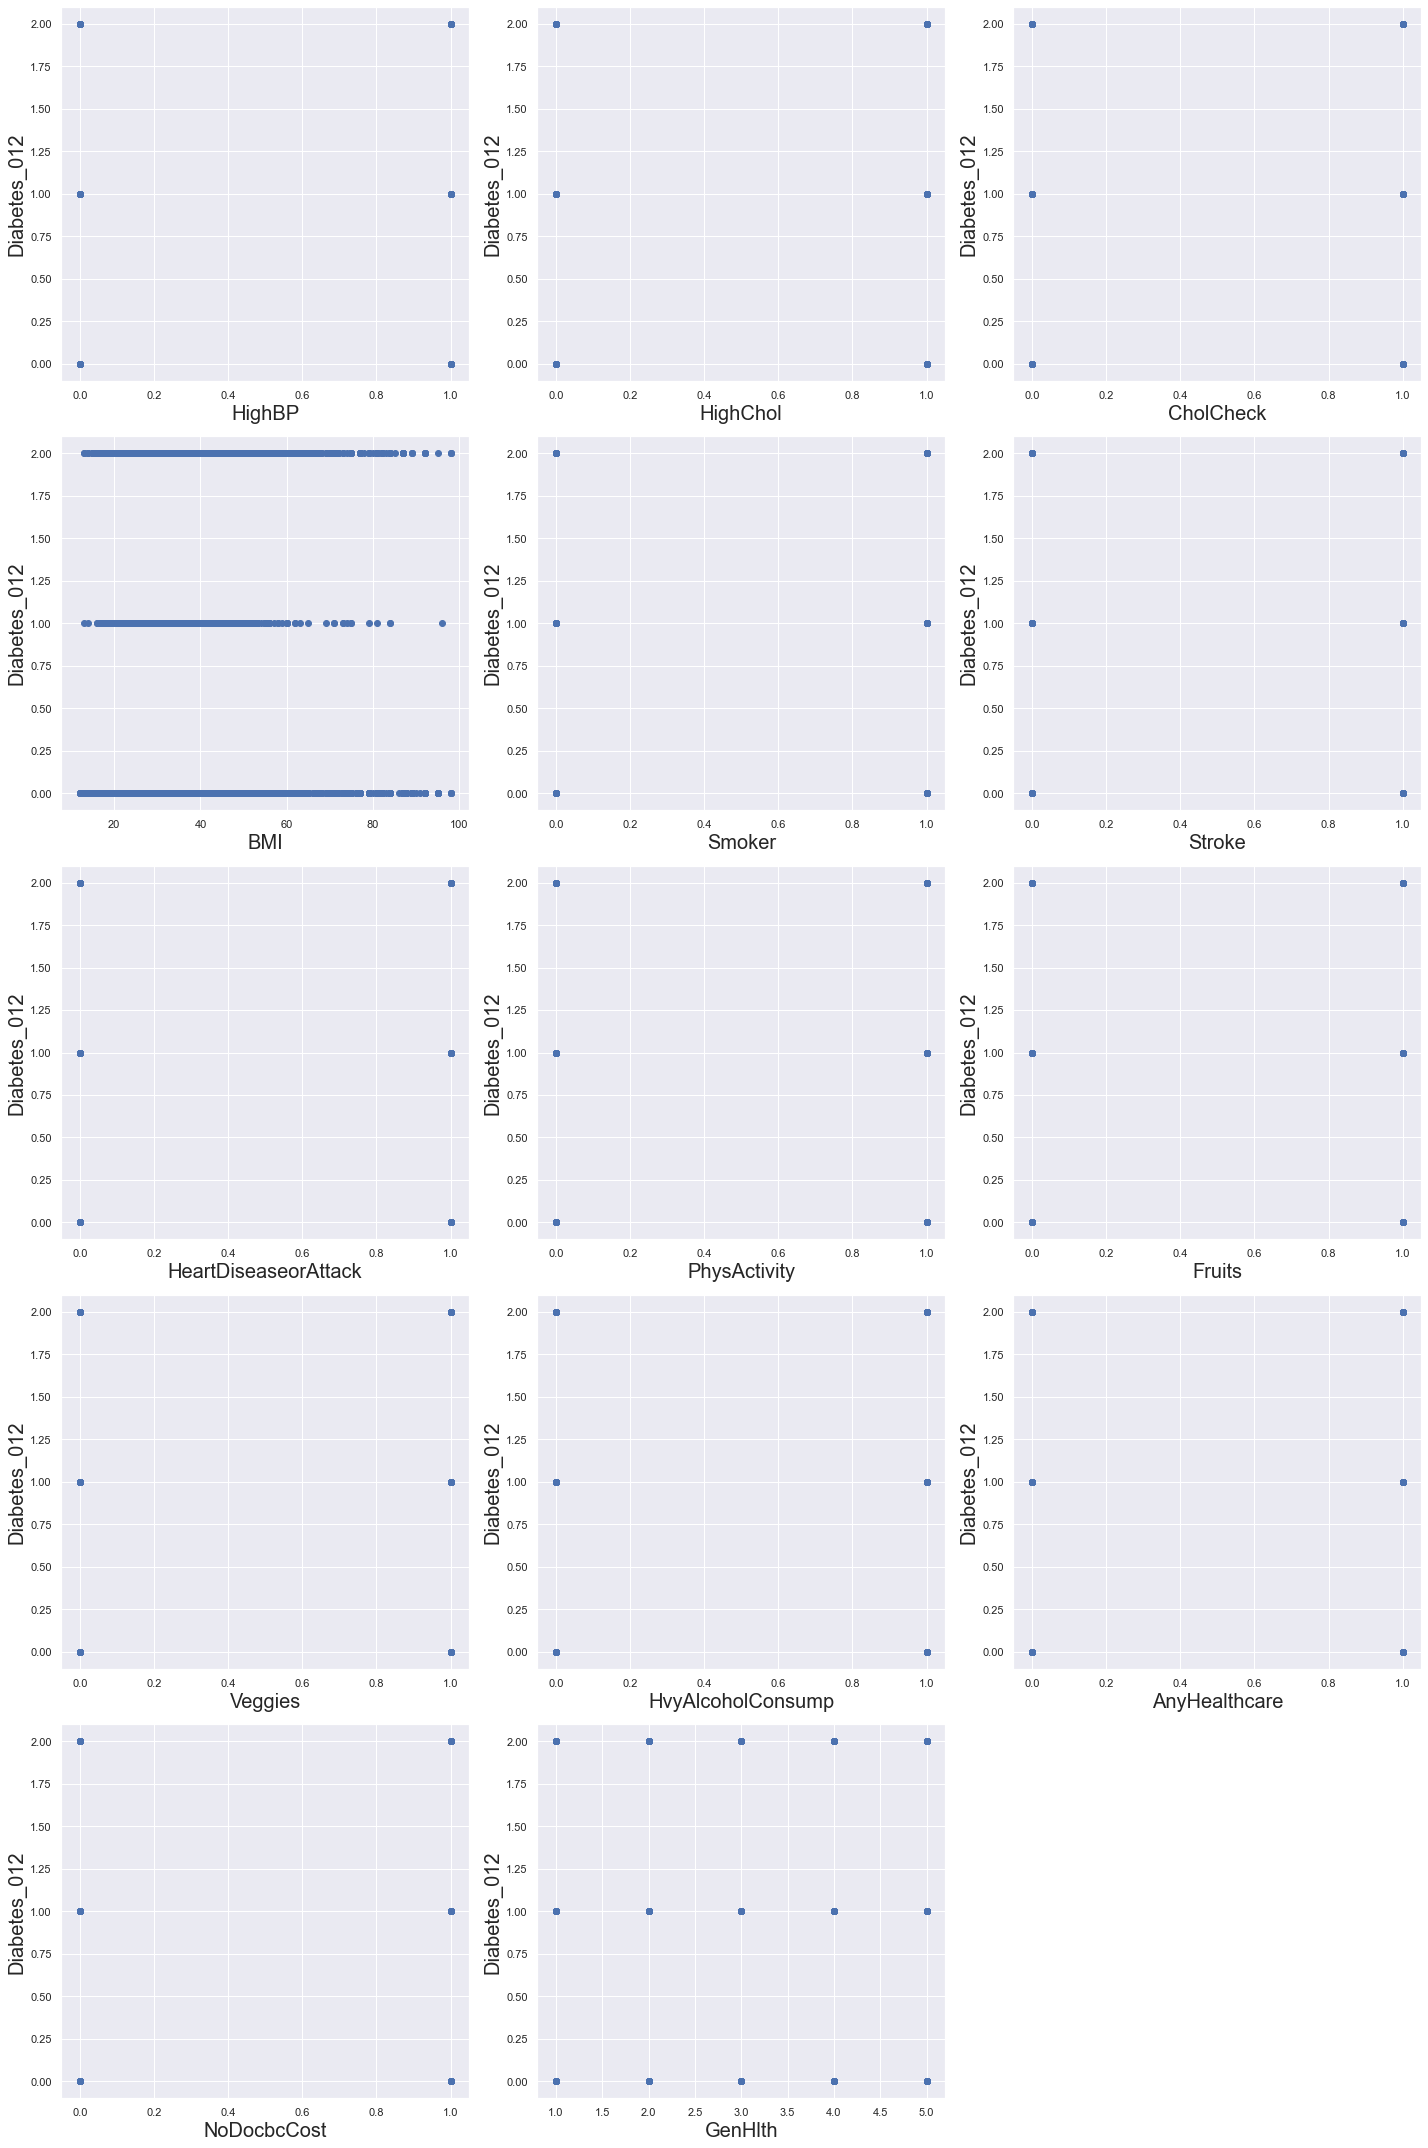

In [9]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Diabetes_012',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [10]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [11]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [21]:
vif

,VIF,Features
0,1.330684,HighBP
1,1.173313,HighChol
2,1.032822,CholCheck
3,1.139724,BMI
4,1.091787,Smoker
5,1.081070,Stroke
6,1.171917,HeartDiseaseorAttack
7,1.157311,PhysActivity
8,1.112533,Fruits
9,1.112385,Veggies


In [13]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [14]:
y_train

222980    0.0
249679    0.0
230277    0.0
98763     0.0
209166    2.0
         ... 
157747    0.0
72995     0.0
24053     0.0
150146    0.0
121598    1.0
Name: Diabetes_012, Length: 190260, dtype: float64

In [15]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [16]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [18]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[1,1,1,28,0,0,0,0,0,1,0,1,0,4]]))
a

array([0.66448185])

In [19]:
regression.score(x_train,y_train)

0.16348225725129295

In [20]:
adj_r2(x_train,y_train)

0.16342069848024254